In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("train-chennai-sale.csv")

In [6]:
df.head(5)

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


In [7]:
df = df.drop(columns="PRT_ID")

In [8]:
df

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,15-05-1967,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,22-12-1995,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,09-02-1992,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,18-03-1988,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,13-10-1979,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,Karapakkam,598,03-01-2011,51,1.0,1.0,2,AdjLand,No,15-01-1962,...,ELO,No Access,RM,3.0,2.2,2.4,2.520,208767,107060,5353000
7105,Velachery,1897,08-04-2004,52,3.0,2.0,5,Family,Yes,11-04-1995,...,NoSeWa,No Access,RH,3.6,4.5,3.3,3.920,346191,205551,10818480
7106,Velachery,1614,25-08-2006,152,2.0,1.0,4,Normal Sale,No,01-09-1978,...,NoSeWa,Gravel,I,4.3,4.2,2.9,3.840,317354,167028,8351410
7107,Karapakkam,787,03-08-2009,40,1.0,1.0,2,Partial,Yes,11-08-1977,...,ELO,Paved,RL,4.6,3.8,4.1,4.160,425350,119098,8507000


# 1 AREA

In [9]:
df["AREA"].isnull().sum()

0

In [10]:
df.AREA.values

array(['Karapakkam', 'Anna Nagar', 'Adyar', ..., 'Velachery',
       'Karapakkam', 'Velachery'], dtype=object)

In [11]:
df.AREA.unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'TNagar', 'T Nagar', 'Chrompt', 'Chrmpet', 'Karapakam',
       'Ana Nagar', 'Chormpet', 'Adyr', 'Velchery', 'Ann Nagar',
       'KKNagar'], dtype=object)

In [12]:
df["AREA"] = df["AREA"].replace({"Adyr":"Adyar","Ann Nagar":"Anna Nagar","Ana Nagar":"Anna Nagar","Chrmpet":"Chormpet","Chrompt":"Chormpet","Chrompet":"Chormpet","KKNagar":"KK Nagar","Karapakam":"Karapakkam","TNagar":"T Nagar","Velachery":"Velchery"})

In [13]:
df.AREA.unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velchery', 'Chormpet',
       'KK Nagar', 'T Nagar'], dtype=object)

<function matplotlib.pyplot.show(close=None, block=None)>

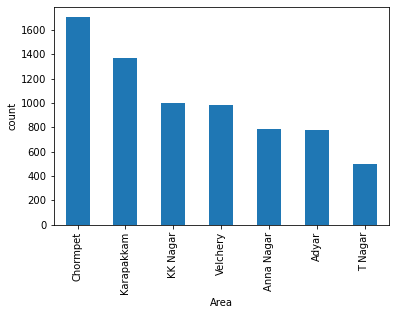

In [14]:
df.AREA.value_counts().plot.bar()
plt.xlabel("Area")
plt.ylabel("count")
plt.show

In [15]:
#From plot we can see chormpet having more house sale
#T Nagar having least house sale

<AxesSubplot:xlabel='AREA'>

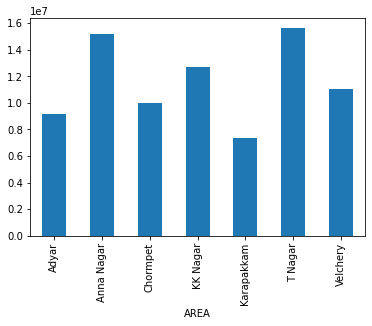

In [16]:
df.groupby("AREA")["SALES_PRICE"].mean().plot.bar()

<AxesSubplot:xlabel='AREA'>

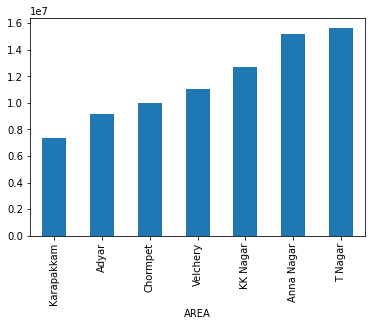

In [17]:
df.groupby("AREA")["SALES_PRICE"].mean().sort_values(ascending = True).plot.bar()


In [18]:
#FRom graph we can say that average price of house in Tnagar costly compare to other areas and low cost on karapakkam 
#the avergae of house is linearly increasing 
#so label encoding is preferable for Area column since we can see ordinal behaviour.

In [19]:
Area = {"Karapakkam":0,"Adyar":1,"Chormpet":2,"Velchery":3,"KK Nagar":4,"Anna Nagar":5,"T Nagar":6}

In [20]:
df.AREA = df["AREA"].replace(Area)

In [21]:
df.columns

Index(['AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS',
       'SALES_PRICE'],
      dtype='object')

# 2 INT_SQFT

In [22]:
df.INT_SQFT.values

array([1004, 1986,  909, ..., 1614,  787, 1896], dtype=int64)

In [23]:
df.INT_SQFT.isnull().sum()

0

In [24]:
df.INT_SQFT.describe()

count    7109.000000
mean     1382.073006
std       457.410902
min       500.000000
25%       993.000000
50%      1373.000000
75%      1744.000000
max      2500.000000
Name: INT_SQFT, dtype: float64

In [25]:
q3 = df.INT_SQFT.quantile(0.75)
q1 = df.INT_SQFT.quantile(0.25)
iqr = q3 - q1 
iqr

751.0

In [26]:
q3 + 1.5*iqr

2870.5

In [27]:
q1 - 1.5*iqr

-133.5

In [28]:
df.INT_SQFT.dtype

dtype('int64')

In [29]:
# there is no outliers and null values

<AxesSubplot:ylabel='Frequency'>

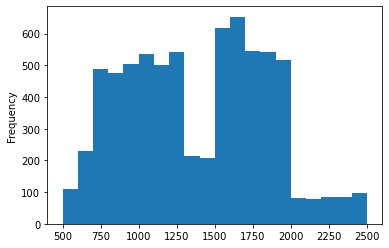

In [30]:
df.INT_SQFT.plot.hist(bins=20)

<AxesSubplot:xlabel='INT_SQFT', ylabel='SALES_PRICE'>

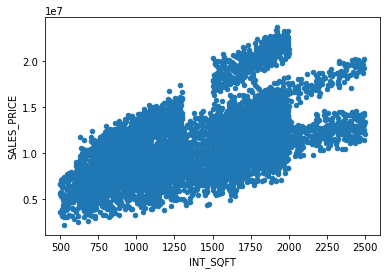

In [31]:
df.plot.scatter(x="INT_SQFT",y="SALES_PRICE")

In [32]:
#from the graph we can see the there is good linear relation between int_sqft and sales_price

In [33]:
df[["INT_SQFT","SALES_PRICE"]].corr()

,INT_SQFT,SALES_PRICE
INT_SQFT,1.000000,0.612125
SALES_PRICE,0.612125,1.000000


# 3 DATE_SALE

In [34]:
df.DATE_SALE.values

array(['04-05-2011', '19-12-2006', '04-02-2012', ..., '25-08-2006',
       '03-08-2009', '13-07-2005'], dtype=object)

In [35]:
df.DATE_SALE.dtype

dtype('O')

In [36]:
df.DATE_SALE = pd.to_datetime(df.DATE_SALE)

In [37]:
df.DATE_SALE.dtype

dtype('<M8[ns]')

In [38]:
df["Sale_year"] = pd.DatetimeIndex(df['DATE_SALE']).year

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   AREA           7109 non-null   int64         
 1   INT_SQFT       7109 non-null   int64         
 2   DATE_SALE      7109 non-null   datetime64[ns]
 3   DIST_MAINROAD  7109 non-null   int64         
 4   N_BEDROOM      7108 non-null   float64       
 5   N_BATHROOM     7104 non-null   float64       
 6   N_ROOM         7109 non-null   int64         
 7   SALE_COND      7109 non-null   object        
 8   PARK_FACIL     7109 non-null   object        
 9   DATE_BUILD     7109 non-null   object        
 10  BUILDTYPE      7109 non-null   object        
 11  UTILITY_AVAIL  7109 non-null   object        
 12  STREET         7109 non-null   object        
 13  MZZONE         7109 non-null   object        
 14  QS_ROOMS       7109 non-null   float64       
 15  QS_BATHROOM    7109 n

In [40]:
df.DATE_SALE.isnull().sum()

0

#  4 DIST_MAINROAD

In [41]:
df.DIST_MAINROAD.values

array([131,  26,  70, ..., 152,  40, 156], dtype=int64)

In [42]:
df.DIST_MAINROAD.isnull().sum()

0

In [43]:
df.DIST_MAINROAD.dtype

dtype('int64')

In [44]:
df.DIST_MAINROAD.describe()

count    7109.000000
mean       99.603179
std        57.403110
min         0.000000
25%        50.000000
50%        99.000000
75%       148.000000
max       200.000000
Name: DIST_MAINROAD, dtype: float64

In [45]:
q3 = df.DIST_MAINROAD.quantile(0.75)
q1 = df.DIST_MAINROAD.quantile(0.25)
iqr = q3 - q1 
iqr

98.0

In [46]:
q3 + 1.5*iqr

295.0

In [47]:
q1 - 1.5*iqr

-97.0

<AxesSubplot:ylabel='Frequency'>

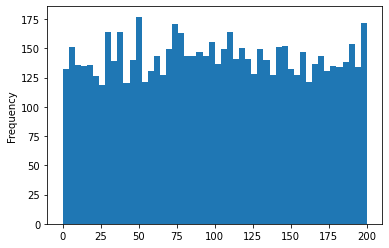

In [48]:
df.DIST_MAINROAD.plot.hist(bins=50)


<AxesSubplot:xlabel='DIST_MAINROAD', ylabel='SALES_PRICE'>

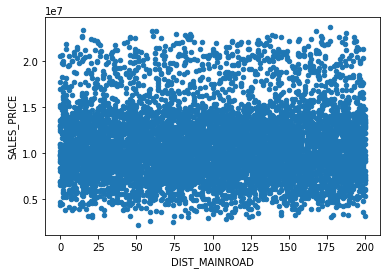

In [49]:
df.plot.scatter(x="DIST_MAINROAD",y="SALES_PRICE")

In [50]:
df["DIST_MAINROAD_sqr"] = df.DIST_MAINROAD**2


<AxesSubplot:xlabel='DIST_MAINROAD_sqr', ylabel='SALES_PRICE'>

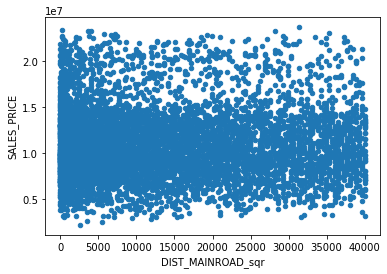

In [51]:
df.plot.scatter(x="DIST_MAINROAD_sqr",y="SALES_PRICE")

In [52]:
df["Transformed"]= np.log(df.DIST_MAINROAD)
df.Transformed.values

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


array([4.87519732, 3.25809654, 4.24849524, ..., 5.02388052, 3.68887945,
       5.04985601])

<AxesSubplot:xlabel='Transformed', ylabel='SALES_PRICE'>

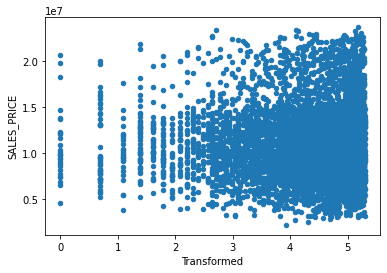

In [53]:
df.plot.scatter(x="Transformed",y="SALES_PRICE")

In [54]:
#we don't see any relationship between dist_mainroad and sale_price we dropping the dist_mairoad column

In [55]:
#No outliers

In [56]:
df =df.drop(columns=["Transformed","DIST_MAINROAD_sqr","DIST_MAINROAD"])


# 5 N_BEDROOM

In [57]:
df.N_BEDROOM.values

array([1., 2., 1., ..., 2., 1., 3.])

In [58]:
df.N_BEDROOM.value_counts()

1.0    3795
2.0    2352
3.0     707
4.0     254
Name: N_BEDROOM, dtype: int64

In [59]:
df.N_BEDROOM.isnull().sum()

1

In [60]:
x = df.N_BEDROOM.mode()
df.N_BEDROOM.fillna(int(x),inplace = True)


In [61]:
df.N_BEDROOM.isnull().sum()

0

In [62]:
df.N_BEDROOM.value_counts()

1.0    3796
2.0    2352
3.0     707
4.0     254
Name: N_BEDROOM, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

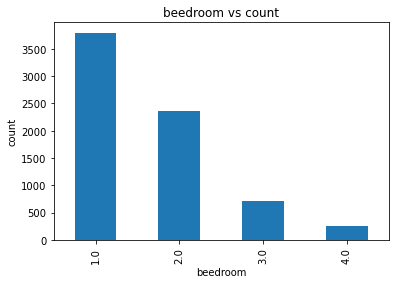

In [63]:
df.N_BEDROOM.value_counts().plot.bar()
plt.title('beedroom vs count')
plt.xlabel("beedroom")
plt.ylabel("count")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

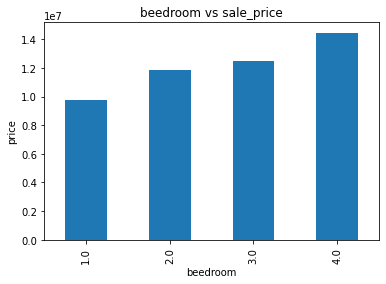

In [64]:
df.groupby("N_BEDROOM")["SALES_PRICE"].mean().plot.bar()
plt.title('beedroom vs sale_price')
plt.xlabel("beedroom")
plt.ylabel("price")
plt.show

In [65]:
# we can say that maximun houses are having 1 bedroom
#we can see that the average of 4 bed room house is high and we can see a linear relation between bedroom and sale price.


In [66]:
df.columns

Index(['AREA', 'INT_SQFT', 'DATE_SALE', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM',
       'SALE_COND', 'PARK_FACIL', 'DATE_BUILD', 'BUILDTYPE', 'UTILITY_AVAIL',
       'STREET', 'MZZONE', 'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM',
       'QS_OVERALL', 'REG_FEE', 'COMMIS', 'SALES_PRICE', 'Sale_year'],
      dtype='object')

# 5 N_BATHROOM

In [67]:
df.N_BATHROOM.values

array([1., 1., 1., ..., 1., 1., 2.])

In [68]:
df.N_BATHROOM.value_counts()

1.0    5589
2.0    1515
Name: N_BATHROOM, dtype: int64

In [69]:
df.N_BATHROOM.isnull().sum()

5

In [70]:
df.N_BATHROOM.isnull().sum()*100/df.shape[0]

0.07033338022225348

In [71]:
x = df.N_BATHROOM.mode()

In [72]:
df.N_BATHROOM.fillna(int(x),inplace = True)

In [73]:
df.N_BATHROOM.isnull().sum()

0

<function matplotlib.pyplot.show(close=None, block=None)>

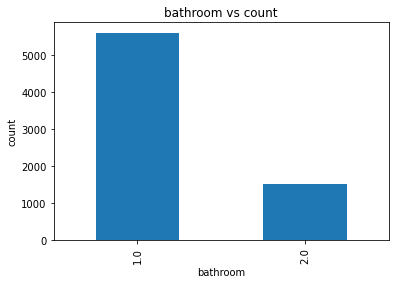

In [74]:
df.N_BATHROOM.value_counts().plot.bar()
plt.title('bathroom vs count')
plt.xlabel("bathroom")
plt.ylabel("count")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

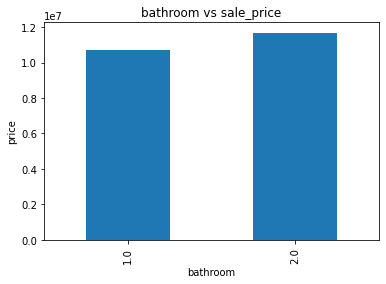

In [75]:
df.groupby("N_BATHROOM")["SALES_PRICE"].mean().plot.bar()
plt.title('bathroom vs sale_price')
plt.xlabel("bathroom")
plt.ylabel("price")
plt.show

In [76]:
#we can see a linear relation between bathroom and saleprice

# 6 N_ROOM

In [77]:
df.N_ROOM.values

array([3, 5, 3, ..., 4, 2, 5], dtype=int64)

In [78]:
df.N_ROOM.value_counts()

4    2563
3    2125
5    1246
2     921
6     254
Name: N_ROOM, dtype: int64

In [79]:
df.N_ROOM.isnull().sum()

0

<function matplotlib.pyplot.show(close=None, block=None)>

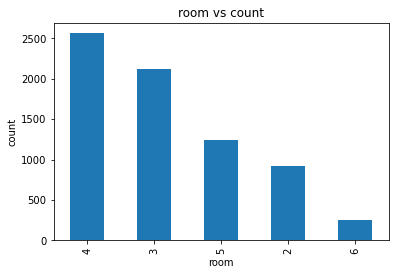

In [80]:
df.N_ROOM.value_counts().plot.bar()
plt.title('room vs count')
plt.xlabel("room")
plt.ylabel("count")
plt.show

In [81]:
# from graph we can say the demand of 4 room house is more and 6 and 2 room houses are less

<function matplotlib.pyplot.show(close=None, block=None)>

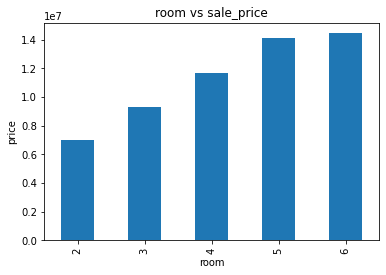

In [82]:
df.groupby("N_ROOM")["SALES_PRICE"].mean().plot.bar()
plt.title('room vs sale_price')
plt.xlabel("room")
plt.ylabel("price")
plt.show

In [83]:
#there is linear relkation between room and saleprice

# 7 SALE_COND

In [84]:
df.SALE_COND.values

array(['AbNormal', 'AbNormal', 'AbNormal', ..., 'Normal Sale', 'Partial',
       'Partial'], dtype=object)

In [85]:
df.SALE_COND.unique()

array(['AbNormal', 'Family', 'Partial', 'AdjLand', 'Normal Sale',
       'Ab Normal', 'Partiall', 'Adj Land', 'PartiaLl'], dtype=object)

In [86]:
df["SALE_COND"] = df["SALE_COND"].replace({"AdjLand":"Adj Land","Partiall":"Partial","PartiaLl":"Partial","AbNormal":"Ab Normal"})

In [87]:
df.SALE_COND.unique()

array(['Ab Normal', 'Family', 'Partial', 'Adj Land', 'Normal Sale'],
      dtype=object)

In [88]:
df.SALE_COND.value_counts()

Adj Land       1439
Partial        1433
Normal Sale    1423
Ab Normal      1411
Family         1403
Name: SALE_COND, dtype: int64

In [89]:
df.SALE_COND.isnull().sum()

0

<function matplotlib.pyplot.show(close=None, block=None)>

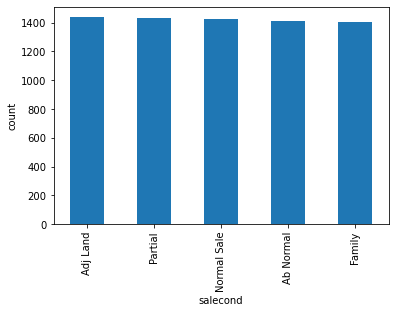

In [90]:
df.SALE_COND.value_counts().plot.bar()
plt.xlabel("salecond")
plt.ylabel("count")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

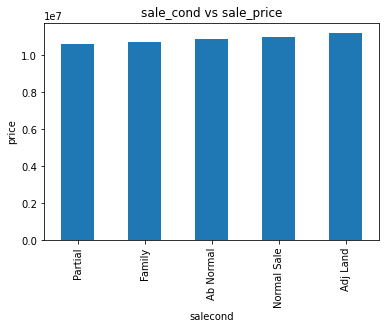

In [91]:
df.groupby("SALE_COND")["SALES_PRICE"].mean().sort_values().plot.bar()
plt.title('sale_cond vs sale_price')
plt.xlabel("salecond")
plt.ylabel("price")
plt.show

In [92]:
#from graph we can see that there is slight linearship between sale cond and sale price

In [93]:
Sale_cond = {"Partial":0,"Family":1,"Ab Normal":2,"Normal Sale":3,"Adj Land":4}

In [94]:
df.SALE_COND =df.SALE_COND.replace(Sale_cond)
    

In [95]:
df.shape

(7109, 21)

In [96]:
df.columns

Index(['AREA', 'INT_SQFT', 'DATE_SALE', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM',
       'SALE_COND', 'PARK_FACIL', 'DATE_BUILD', 'BUILDTYPE', 'UTILITY_AVAIL',
       'STREET', 'MZZONE', 'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM',
       'QS_OVERALL', 'REG_FEE', 'COMMIS', 'SALES_PRICE', 'Sale_year'],
      dtype='object')

# 8 PARK_FACIL

In [97]:
df.PARK_FACIL.values

array(['Yes', 'No', 'Yes', ..., 'No', 'Yes', 'Yes'], dtype=object)

In [98]:
df.PARK_FACIL.isnull().sum()

0

In [99]:
df.PARK_FACIL = df.PARK_FACIL.replace({"Yes":1,"No":0,"Noo":0})

In [100]:
df.PARK_FACIL.values

array([1, 0, 1, ..., 0, 1, 1], dtype=int64)

<AxesSubplot:>

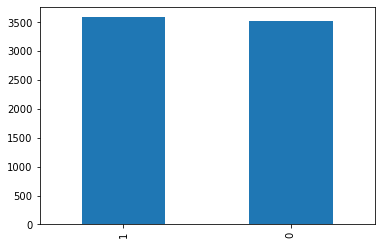

In [101]:
df.PARK_FACIL.value_counts().plot.bar()

<AxesSubplot:xlabel='PARK_FACIL'>

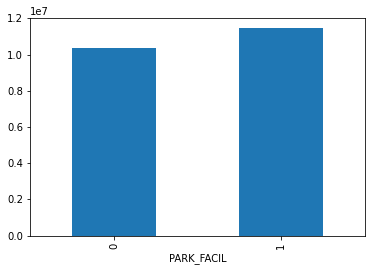

In [102]:
df.groupby("PARK_FACIL")["SALES_PRICE"].mean().plot.bar()

In [103]:
#we can see a linear relation between parkfacil and salesprice

# 9 DATE_BUILD

In [104]:
df.DATE_BUILD.values

array(['15-05-1967', '22-12-1995', '09-02-1992', ..., '01-09-1978',
       '11-08-1977', '24-07-1961'], dtype=object)

In [105]:
df.DATE_BUILD.dtype

dtype('O')

In [106]:
df.DATE_BUILD.isnull().sum()

0

In [107]:
df.DATE_BUILD = pd.to_datetime(df.DATE_BUILD)

In [108]:
df.DATE_BUILD.dtype

dtype('<M8[ns]')

In [109]:
df["Build_year"] = pd.DatetimeIndex(df['DATE_BUILD']).year


In [110]:
df.shape

(7109, 22)

In [111]:
df["AGE"] = df["Sale_year"] - df["Build_year"]

In [112]:
df["AGE"]

0       44
1       11
2       20
3       22
4       30
        ..
7104    49
7105     9
7106    28
7107    32
7108    44
Name: AGE, Length: 7109, dtype: int64

# 10 AGE

In [113]:
df.AGE.values

array([44, 11, 20, ..., 28, 32, 44], dtype=int64)

<AxesSubplot:ylabel='Frequency'>

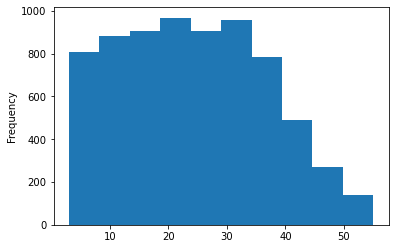

In [114]:
df.AGE.plot.hist(bins=10)

In [115]:
df.AGE.describe()

count    7109.000000
mean       24.276270
std        12.334164
min         3.000000
25%        14.000000
50%        23.000000
75%        34.000000
max        55.000000
Name: AGE, dtype: float64

In [116]:
q3 = df.AGE.quantile(0.75)
q1 = df.AGE.quantile(0.25)
iqr = q3-q1
iqr

20.0

In [117]:
q3 + 1.5*iqr

64.0

In [118]:
q1 - 1.5*iqr

-16.0

<function matplotlib.pyplot.show(close=None, block=None)>

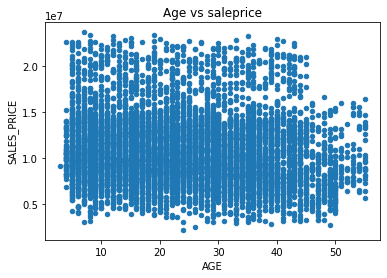

In [119]:
df.plot.scatter(x="AGE",y="SALES_PRICE")
plt.title("Age vs saleprice")
plt.show

<AxesSubplot:xlabel='Transformed', ylabel='SALES_PRICE'>

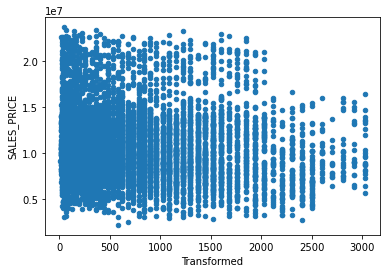

In [120]:
df["Transformed"] = np.square(df.AGE)
df.plot.scatter(x="Transformed",y="SALES_PRICE")

<AxesSubplot:xlabel='Transformed', ylabel='SALES_PRICE'>

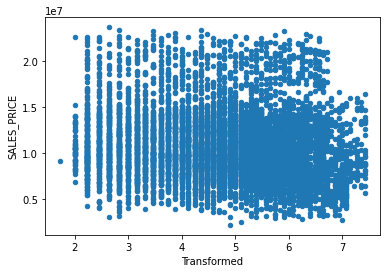

In [121]:
df["Transformed"] = np.power(df.AGE,0.5)
df.plot.scatter(x="Transformed",y="SALES_PRICE")

<AxesSubplot:xlabel='Transformed', ylabel='SALES_PRICE'>

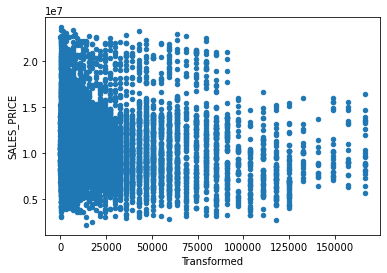

In [122]:
df["Transformed"] = np.power(df.AGE,3)
df.plot.scatter(x="Transformed",y="SALES_PRICE")

<AxesSubplot:xlabel='Transformed', ylabel='SALES_PRICE'>

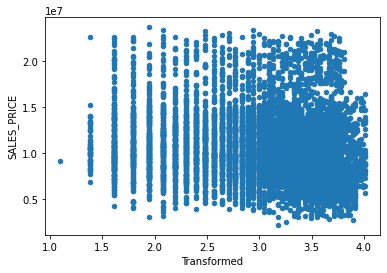

In [123]:
df["Transformed"] = np.log(df.AGE)
df.plot.scatter(x="Transformed",y="SALES_PRICE")

In [124]:
df = df.drop(columns=["Sale_year","Build_year","DATE_BUILD","DATE_SALE"])


In [125]:
#since we don't see any relation between age and sales price we droping the column
df = df.drop(columns=["AGE","Transformed"])

In [126]:
df.shape

(7109, 18)

In [127]:
df.columns

Index(['AREA', 'INT_SQFT', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'SALE_COND',
       'PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE',
       'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE',
       'COMMIS', 'SALES_PRICE'],
      dtype='object')

# 11 BUILDTYPE

In [128]:
df.BUILDTYPE.values

array(['Commercial', 'Commercial', 'Commercial', ..., 'House',
       'Commercial', 'Others'], dtype=object)

In [129]:
df.BUILDTYPE.unique()

array(['Commercial', 'Others', 'Other', 'House', 'Comercial'],
      dtype=object)

In [130]:
df.BUILDTYPE.value_counts()

House         2444
Commercial    2325
Others        2310
Other           26
Comercial        4
Name: BUILDTYPE, dtype: int64

In [131]:
df.BUILDTYPE = df.BUILDTYPE.replace({"Other":"Others","Comercial":"Commercial"})

<AxesSubplot:>

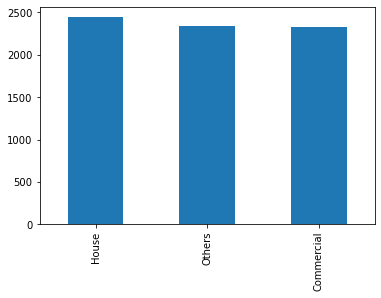

In [132]:
df.BUILDTYPE.value_counts().plot.bar()

In [133]:
df.BUILDTYPE.isnull().sum()

0

<AxesSubplot:xlabel='BUILDTYPE'>

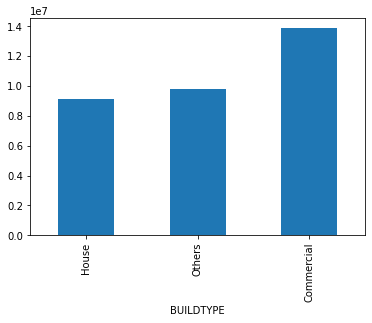

In [134]:
df.groupby("BUILDTYPE")["SALES_PRICE"].mean().sort_values(ascending = True).plot.bar()

In [135]:
#since we cannot see linear relation we going for one hot encoding for column Buildtype

In [136]:
df = pd.get_dummies(df,columns=["BUILDTYPE"])

In [137]:
df.columns

Index(['AREA', 'INT_SQFT', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'SALE_COND',
       'PARK_FACIL', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS',
       'SALES_PRICE', 'BUILDTYPE_Commercial', 'BUILDTYPE_House',
       'BUILDTYPE_Others'],
      dtype='object')

# 12 UTILITY_AVAIL}

In [138]:
df.UTILITY_AVAIL.values

array(['AllPub', 'AllPub', 'ELO', ..., 'NoSeWa', 'ELO', 'ELO'],
      dtype=object)

In [139]:
df.UTILITY_AVAIL.unique()

array(['AllPub', 'ELO', 'NoSewr ', 'NoSeWa', 'All Pub'], dtype=object)

In [140]:
df.UTILITY_AVAIL.value_counts()

AllPub     1886
NoSeWa     1871
NoSewr     1829
ELO        1522
All Pub       1
Name: UTILITY_AVAIL, dtype: int64

In [141]:
df.UTILITY_AVAIL=df.UTILITY_AVAIL.replace({"All Pub":"AllPub"})

In [142]:
df.UTILITY_AVAIL.value_counts()

AllPub     1887
NoSeWa     1871
NoSewr     1829
ELO        1522
Name: UTILITY_AVAIL, dtype: int64

<AxesSubplot:>

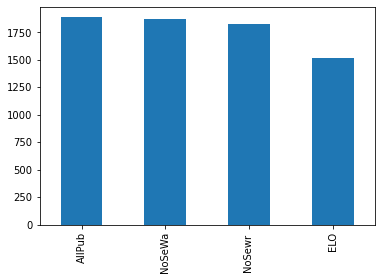

In [143]:
df.UTILITY_AVAIL.value_counts().plot.bar()

<AxesSubplot:xlabel='UTILITY_AVAIL'>

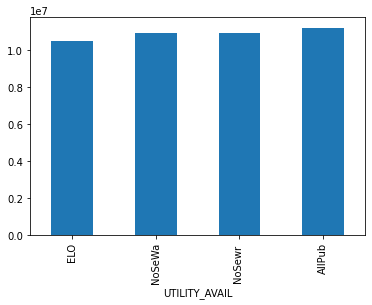

In [144]:
df.groupby("UTILITY_AVAIL")["SALES_PRICE"].mean().sort_values(ascending = True).plot.bar()

In [145]:
utility_avail = {"ELO":0,"NoSeWa":1,"NoSewr ":2,"AllPub":3}

In [146]:
df.UTILITY_AVAIL = df.UTILITY_AVAIL.replace(utility_avail)

In [147]:
df.UTILITY_AVAIL.values

array([3, 3, 0, ..., 1, 0, 0], dtype=int64)

In [148]:
df.columns

Index(['AREA', 'INT_SQFT', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'SALE_COND',
       'PARK_FACIL', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS',
       'SALES_PRICE', 'BUILDTYPE_Commercial', 'BUILDTYPE_House',
       'BUILDTYPE_Others'],
      dtype='object')

In [149]:
df.UTILITY_AVAIL.value_counts()

3    1887
1    1871
2    1829
0    1522
Name: UTILITY_AVAIL, dtype: int64

# 13 STREET

In [150]:
df.STREET.values

array(['Paved', 'Gravel', 'Gravel', ..., 'Gravel', 'Paved', 'Paved'],
      dtype=object)

In [151]:
df.STREET.value_counts()

Paved        2560
Gravel       2520
No Access    2010
Pavd           12
NoAccess        7
Name: STREET, dtype: int64

In [152]:
df.STREET = df.STREET.replace({"NoAccess":"No Access","Pavd":"Paved"})

In [153]:
df.STREET.value_counts()

Paved        2572
Gravel       2520
No Access    2017
Name: STREET, dtype: int64

In [154]:
df.STREET.isnull().sum()

0

<AxesSubplot:xlabel='STREET'>

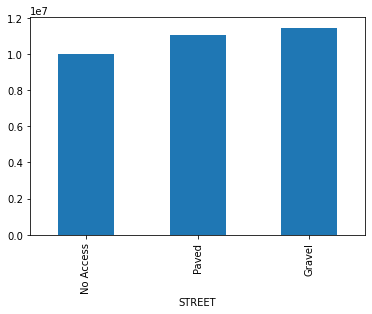

In [155]:
df.groupby("STREET")["SALES_PRICE"].mean().sort_values(ascending = True).plot.bar()

In [156]:
street = {"No Access":0,"Paved":1,"Gravel":2}
df.STREET = df.STREET.replace(street)

In [157]:
df.columns

Index(['AREA', 'INT_SQFT', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'SALE_COND',
       'PARK_FACIL', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS',
       'SALES_PRICE', 'BUILDTYPE_Commercial', 'BUILDTYPE_House',
       'BUILDTYPE_Others'],
      dtype='object')

# 14 	MZZONE

In [158]:
df.	MZZONE.values

array(['A', 'RH', 'RL', ..., 'I', 'RL', 'I'], dtype=object)

In [159]:
df.	MZZONE.value_counts()

RL    1858
RH    1822
RM    1817
C      550
A      537
I      525
Name: MZZONE, dtype: int64

In [160]:
df.	MZZONE.isnull().sum()

0

<AxesSubplot:xlabel='MZZONE'>

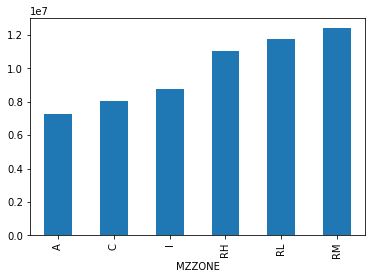

In [161]:
df.groupby("MZZONE")["SALES_PRICE"].mean().sort_values(ascending = True).plot.bar()

In [162]:
Mzzone = {"A":0,"C":1,"I":2,"RH":3,"RL":4,"RM":5}

In [163]:
df.MZZONE = df.MZZONE.replace(Mzzone)

In [164]:
df.	MZZONE.value_counts()

4    1858
3    1822
5    1817
1     550
0     537
2     525
Name: MZZONE, dtype: int64

In [165]:
df.columns

Index(['AREA', 'INT_SQFT', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'SALE_COND',
       'PARK_FACIL', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS',
       'SALES_PRICE', 'BUILDTYPE_Commercial', 'BUILDTYPE_House',
       'BUILDTYPE_Others'],
      dtype='object')

In [166]:
#since we don't required the columns registration fee and commission fee we droping the columns

In [167]:
df = df.drop(columns=['REG_FEE', 'COMMIS'])

In [168]:
df.columns

Index(['AREA', 'INT_SQFT', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'SALE_COND',
       'PARK_FACIL', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'SALES_PRICE',
       'BUILDTYPE_Commercial', 'BUILDTYPE_House', 'BUILDTYPE_Others'],
      dtype='object')

In [169]:
df.QS_ROOMS.values

array([4. , 4.9, 4.1, ..., 4.3, 4.6, 3.1])

<AxesSubplot:xlabel='QS_ROOMS', ylabel='SALES_PRICE'>

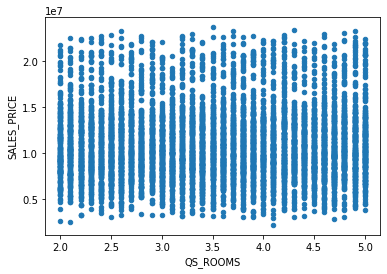

In [170]:
df.plot.scatter(x="QS_ROOMS",y="SALES_PRICE")

<AxesSubplot:xlabel='QS_BATHROOM', ylabel='SALES_PRICE'>

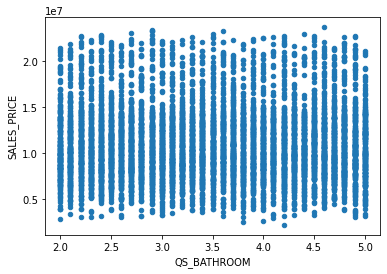

In [171]:
df.plot.scatter(x="QS_BATHROOM",y="SALES_PRICE")

<AxesSubplot:xlabel='QS_BEDROOM', ylabel='SALES_PRICE'>

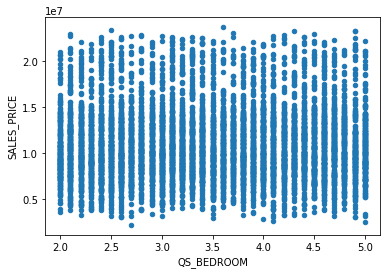

In [172]:
df.plot.scatter(x="QS_BEDROOM",y="SALES_PRICE")

<AxesSubplot:xlabel='QS_OVERALL', ylabel='SALES_PRICE'>

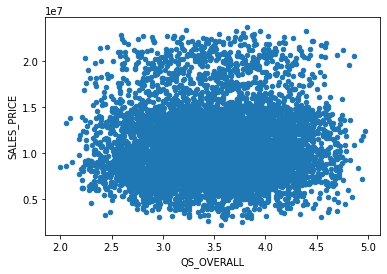

In [173]:
df.plot.scatter(x="QS_OVERALL",y="SALES_PRICE")

In [174]:
#since we don't see any relation between sale prices and QS columns we are going to drop  them

In [175]:
df=df.drop(columns=['QS_ROOMS','QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL'])

In [176]:
df.columns

Index(['AREA', 'INT_SQFT', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'SALE_COND',
       'PARK_FACIL', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'SALES_PRICE',
       'BUILDTYPE_Commercial', 'BUILDTYPE_House', 'BUILDTYPE_Others'],
      dtype='object')

In [177]:
df.shape

(7109, 14)

In [178]:
df = df.drop_duplicates()

In [179]:
df.shape

(7109, 14)

In [180]:
df.N_BEDROOM = df.N_BEDROOM.astype("int64")

In [181]:
df.N_BATHROOM = df.N_BATHROOM.astype("int64")

In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7109 entries, 0 to 7108
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   AREA                  7109 non-null   int64
 1   INT_SQFT              7109 non-null   int64
 2   N_BEDROOM             7109 non-null   int64
 3   N_BATHROOM            7109 non-null   int64
 4   N_ROOM                7109 non-null   int64
 5   SALE_COND             7109 non-null   int64
 6   PARK_FACIL            7109 non-null   int64
 7   UTILITY_AVAIL         7109 non-null   int64
 8   STREET                7109 non-null   int64
 9   MZZONE                7109 non-null   int64
 10  SALES_PRICE           7109 non-null   int64
 11  BUILDTYPE_Commercial  7109 non-null   uint8
 12  BUILDTYPE_House       7109 non-null   uint8
 13  BUILDTYPE_Others      7109 non-null   uint8
dtypes: int64(11), uint8(3)
memory usage: 687.3 KB


# Spliting

In [218]:
X = df[['AREA', 'INT_SQFT', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'SALE_COND',
       'PARK_FACIL', 'UTILITY_AVAIL', 'STREET', 'MZZONE',
       'BUILDTYPE_Commercial', 'BUILDTYPE_House', 'BUILDTYPE_Others']]

In [219]:
Y = df[["SALES_PRICE"]]

In [220]:
X.shape,Y.shape

((7109, 13), (7109, 1))

In [221]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state = 5)

In [222]:
X_train.shape,X_test.shape

((5331, 13), (1778, 13))

In [223]:
y_train.shape,y_test.shape

((5331, 1), (1778, 1))

In [224]:
df.head(5)

,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,UTILITY_AVAIL,STREET,MZZONE,SALES_PRICE,BUILDTYPE_Commercial,BUILDTYPE_House,BUILDTYPE_Others
0,0,1004,1,1,3,2,1,3,1,0,7600000,1,0,0
1,5,1986,2,1,5,2,0,3,2,3,21717770,1,0,0
2,1,909,1,1,3,2,1,0,2,4,13159200,1,0,0
3,3,1855,3,2,5,1,0,2,1,2,9630290,0,0,1
4,0,1226,1,1,3,2,1,3,2,1,7406250,0,0,1


# Scaling 

In [225]:
from sklearn.preprocessing import StandardScaler # importing the required function
scaler = StandardScaler() #initialis
scaler.fit(X_train) # find the values of mu and sigma
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [226]:
X_train

array([[-1.37442975, -0.36162181, -0.79672428, ..., -0.69045731,
        -0.73082195,  1.42805415],
       [-1.37442975,  0.45791454,  0.45322779, ...,  1.44831546,
        -0.73082195, -0.70025356],
       [ 0.25032116,  0.75373648,  0.45322779, ..., -0.69045731,
         1.36832234, -0.70025356],
       ...,
       [-1.37442975, -1.2775742 , -0.79672428, ..., -0.69045731,
        -0.73082195,  1.42805415],
       [ 1.33348843,  0.67046808, -0.79672428, ..., -0.69045731,
         1.36832234, -0.70025356],
       [-1.37442975, -1.30386948, -0.79672428, ..., -0.69045731,
        -0.73082195,  1.42805415]])

# Modeling

In [192]:
from sklearn.linear_model import LinearRegression #importing all the required functions
regressor = LinearRegression() # spredicted score = m * hours + c  

regressor.fit(X_train, y_train)

LinearRegression()

In [193]:
print(regressor.intercept_)

[10855461.36465954]


In [194]:
print(regressor.coef_)

[[ 1078707.50360485   630786.63326103 -1235422.79262729   113413.58713878
   1736736.41233594   223726.16140465   535730.55210821    71471.87715063
    409765.91308918   886342.8800555   1349157.02489684  -828172.34058984
   -502877.42833827]]


In [195]:
y_pred = regressor.predict(X_test)

# Evalution

In [196]:
from sklearn import metrics 
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.9241745204062534


In [197]:
coeff_df = pd.DataFrame([ 1078707.50360485  , 630786.63326103 ,-1235422.79262729   ,113413.58713878,
   1736736.41233594 ,  223726.16140465,   535730.55210821  ,  71471.87715063,
    409765.91308918 ,  886342.8800555,   1349157.02489684,  -828172.34058984,
   -502877.42833827],['AREA', 'INT_SQFT', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'SALE_COND','PARK_FACIL', 'UTILITY_AVAIL', 'STREET', 'MZZONE',
'BUILDTYPE_Commercial', 'BUILDTYPE_House', 'BUILDTYPE_Others'], columns=['Coefficient'])
coeff_df

,Coefficient
AREA,1.078708e+06
INT_SQFT,6.307866e+05
N_BEDROOM,-1.235423e+06
N_BATHROOM,1.134136e+05
N_ROOM,1.736736e+06
SALE_COND,2.237262e+05
PARK_FACIL,5.357306e+05
UTILITY_AVAIL,7.147188e+04
STREET,4.097659e+05
MZZONE,8.863429e+05


In [198]:
#Area,N_bedroom,,N_room,BUILDTYPE_Commercial are important futures.

# Sequential Feature selection

In [199]:
!pip install scikit-learn==0.24.2

In [200]:
from sklearn.feature_selection import SequentialFeatureSelector
estimator = LinearRegression()
sfs = SequentialFeatureSelector(estimator, n_features_to_select=2)
sfs.fit(X_train, y_train)
print(list(zip(['AREA', 'INT_SQFT', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'SALE_COND','PARK_FACIL', 'UTILITY_AVAIL', 'STREET', 'MZZONE',
'BUILDTYPE_Commercial', 'BUILDTYPE_House', 'BUILDTYPE_Others'],sfs.get_support())))

[('AREA', True), ('INT_SQFT', False), ('N_BEDROOM', False), ('N_BATHROOM', False), ('N_ROOM', False), ('SALE_COND', False), ('PARK_FACIL', False), ('UTILITY_AVAIL', False), ('STREET', False), ('MZZONE', False), ('BUILDTYPE_Commercial', True), ('BUILDTYPE_House', False), ('BUILDTYPE_Others', False)]


In [201]:
X_trans = sfs.transform(X)
X_trans


array([[0, 1],
       [5, 1],
       [1, 1],
       ...,
       [3, 0],
       [0, 1],
       [3, 0]], dtype=int64)

# Cross Validation

In [202]:
from sklearn.model_selection import cross_validate
regressor = LinearRegression(normalize = True)

In [203]:
cv_results = cross_validate(regressor, X_train, y_train, cv=10, scoring = "r2")
cv_results['test_score'].mean()

0.9178774599077142

# KNN Modeling

In [204]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import roc_auc_score
for i in [1,2,3,4,5,6,7,8,9,10,20,50]:
  knn = KNeighborsRegressor(i) #initialising the model
  knn.fit(X_train,y_train)# training the model
  y_pred = knn.predict(X_test)
  print("K value  : " , i, " score : ", 'R2- SCORE:', metrics.r2_score(y_test,y_pred))

K value  :  1  score :  R2- SCORE: 0.935471586783807
K value  :  2  score :  R2- SCORE: 0.9511115466554855
K value  :  3  score :  R2- SCORE: 0.956691378182732
K value  :  4  score :  R2- SCORE: 0.9581122075436342
K value  :  5  score :  R2- SCORE: 0.9573501262217394
K value  :  6  score :  R2- SCORE: 0.956275355468298
K value  :  7  score :  R2- SCORE: 0.9562183173136622
K value  :  8  score :  R2- SCORE: 0.9560945784231715
K value  :  9  score :  R2- SCORE: 0.9553567969330085
K value  :  10  score :  R2- SCORE: 0.9541440766213372
K value  :  20  score :  R2- SCORE: 0.9462505456955411
K value  :  50  score :  R2- SCORE: 0.9191689984367208


In [205]:
# k=4 we are getting the best R2 score

In [227]:
from sklearn.neighbors import KNeighborsRegressor
for i in [1,2,3,4,5,6,7,8,9,10,20,50]:
    knn = KNeighborsRegressor(i)
    cv_results = cross_validate(knn, X_train, y_train, cv=10, scoring = "r2")
    print("K value  : " , i, " score : ", 'CV- SCORE:' , cv_results['test_score'].mean())

K value  :  1  score :  CV- SCORE: 0.9251739487306964
K value  :  2  score :  CV- SCORE: 0.9440396431886292
K value  :  3  score :  CV- SCORE: 0.9485283097381851
K value  :  4  score :  CV- SCORE: 0.9506020146237587
K value  :  5  score :  CV- SCORE: 0.9507512461587249
K value  :  6  score :  CV- SCORE: 0.9504549742729012
K value  :  7  score :  CV- SCORE: 0.9504001964231581
K value  :  8  score :  CV- SCORE: 0.9498249184593582
K value  :  9  score :  CV- SCORE: 0.9488255860280965
K value  :  10  score :  CV- SCORE: 0.9478206566220241
K value  :  20  score :  CV- SCORE: 0.9365546381852139
K value  :  50  score :  CV- SCORE: 0.9087875958600181


In [207]:
#k = 5  we are best cross validation score

In [208]:
knn = KNeighborsRegressor(5)
knn.fit(X_train,y_train)# training the model
y_pred = knn.predict(X_test)
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.9573501262217394


# Decession Tree

In [209]:
from sklearn.tree import DecisionTreeRegressor

In [210]:
from sklearn.model_selection import cross_val_score #this will help me to do cross- validation
import numpy as np

for depth in [1,2,3,4,5,6,7,8,9,10,20]:
  dt = DecisionTreeRegressor(max_depth=depth) # will tell the DT to not grow past the given threhsold
  # Fit dt to the training set
  dt.fit(X_train, y_train) # the model is trained
  trainR2score = metrics.r2_score(y_train, dt.predict(X_train)) # this is useless information - i am showing to prove a point
  dt = DecisionTreeRegressor(max_depth=depth) # a fresh model which is not trained yet
  cv_results = cross_validate(dt, X, Y, cv=10, scoring = "r2")
  
  print("Depth  : ", depth, " Training R2score : ", trainR2score, " Cross val score : " ,cv_results['test_score'].mean())

Depth  :  1  Training R2score :  0.36335197032790845  Cross val score :  0.3588875752516194
Depth  :  2  Training R2score :  0.6789071015258271  Cross val score :  0.6819059001742293
Depth  :  3  Training R2score :  0.8025851490135403  Cross val score :  0.8016324100218641
Depth  :  4  Training R2score :  0.8864802269681707  Cross val score :  0.8820146308226893
Depth  :  5  Training R2score :  0.9205382932483376  Cross val score :  0.9151939950985589
Depth  :  6  Training R2score :  0.9430885684086734  Cross val score :  0.9358665043374771
Depth  :  7  Training R2score :  0.9593451049689457  Cross val score :  0.9505894319599847
Depth  :  8  Training R2score :  0.9729841316597942  Cross val score :  0.9618454883630226
Depth  :  9  Training R2score :  0.9825870551865716  Cross val score :  0.9695028882603787
Depth  :  10  Training R2score :  0.9894623713170047  Cross val score :  0.9737909382325226
Depth  :  20  Training R2score :  0.9999928429310777  Cross val score :  0.9761015346583

In [211]:
# we don't prefer Decession tree algorithm because the model was leading to overfitting

# Random Forest

In [212]:
from sklearn.ensemble import RandomForestRegressor

In [213]:
for depth in [1,2,3,4,5,6,7,8,9,10,20]:
    regr = RandomForestRegressor(max_depth=depth)
    regr.fit(X_train, y_train) # the model is trained
    trainR2score = metrics.r2_score(y_train, regr.predict(X_train))
    
    regr = RandomForestRegressor(max_depth=depth)
    cv_results = cross_validate(regr, X, Y, cv=10, scoring = "r2")
    print("Depth  : ", depth, " Training R2score : ", trainR2score, " Cross val score : " ,cv_results['test_score'].mean())
    

C:\Users\SAIGAY~1\AppData\Local\Temp/ipykernel_18172/1179694538.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(X_train, y_train) # the model is trained
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when

Depth  :  1  Training R2score :  0.36334954467748204  Cross val score :  0.3588782234215664


C:\Users\SAIGAY~1\AppData\Local\Temp/ipykernel_18172/1179694538.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(X_train, y_train) # the model is trained
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when

Depth  :  2  Training R2score :  0.6789037637791422  Cross val score :  0.6819074948717511


C:\Users\SAIGAY~1\AppData\Local\Temp/ipykernel_18172/1179694538.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(X_train, y_train) # the model is trained
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when

Depth  :  3  Training R2score :  0.8081532981007755  Cross val score :  0.8112777923788561


C:\Users\SAIGAY~1\AppData\Local\Temp/ipykernel_18172/1179694538.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(X_train, y_train) # the model is trained
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when

Depth  :  4  Training R2score :  0.896723935977506  Cross val score :  0.8918717509819629


C:\Users\SAIGAY~1\AppData\Local\Temp/ipykernel_18172/1179694538.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(X_train, y_train) # the model is trained
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when

Depth  :  5  Training R2score :  0.9338494499839146  Cross val score :  0.9274524155088862


C:\Users\SAIGAY~1\AppData\Local\Temp/ipykernel_18172/1179694538.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(X_train, y_train) # the model is trained
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when

Depth  :  6  Training R2score :  0.9572473061094227  Cross val score :  0.9500922438729168


C:\Users\SAIGAY~1\AppData\Local\Temp/ipykernel_18172/1179694538.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(X_train, y_train) # the model is trained
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when

Depth  :  7  Training R2score :  0.9729530810795386  Cross val score :  0.965732835868312


C:\Users\SAIGAY~1\AppData\Local\Temp/ipykernel_18172/1179694538.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(X_train, y_train) # the model is trained
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when

Depth  :  8  Training R2score :  0.9829235118360582  Cross val score :  0.9758560178576559


C:\Users\SAIGAY~1\AppData\Local\Temp/ipykernel_18172/1179694538.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(X_train, y_train) # the model is trained
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when

Depth  :  9  Training R2score :  0.9897251023735358  Cross val score :  0.9822827917754104


C:\Users\SAIGAY~1\AppData\Local\Temp/ipykernel_18172/1179694538.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(X_train, y_train) # the model is trained
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when

Depth  :  10  Training R2score :  0.9936811643194899  Cross val score :  0.9859754966170702


C:\Users\SAIGAY~1\AppData\Local\Temp/ipykernel_18172/1179694538.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(X_train, y_train) # the model is trained
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when

Depth  :  20  Training R2score :  0.9983197248712565  Cross val score :  0.9891885619347575


In [214]:
#for depth = 3 We are getting 0.81 cross validation score

# we have got best R2 score and crossvalidation score for Linear regression 0.911 and Knn with k = 5  0.95

# using future inportance we can see two inportant features are  "Area" and "BUILDTYPE_Commercial"